## Classification Tasks (KNN - Computing Accuracy)

In [33]:
# Import the required libraries and api's

%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# looking up unique fruit names

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Analyzing the data

In [37]:
from matplotlib import cm

## scatter matrix
X = fruits[['height', 'width', 'mass', 'color_score']] # Input

y = fruits[['fruit_label']] # output

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)


<IPython.core.display.Javascript object>


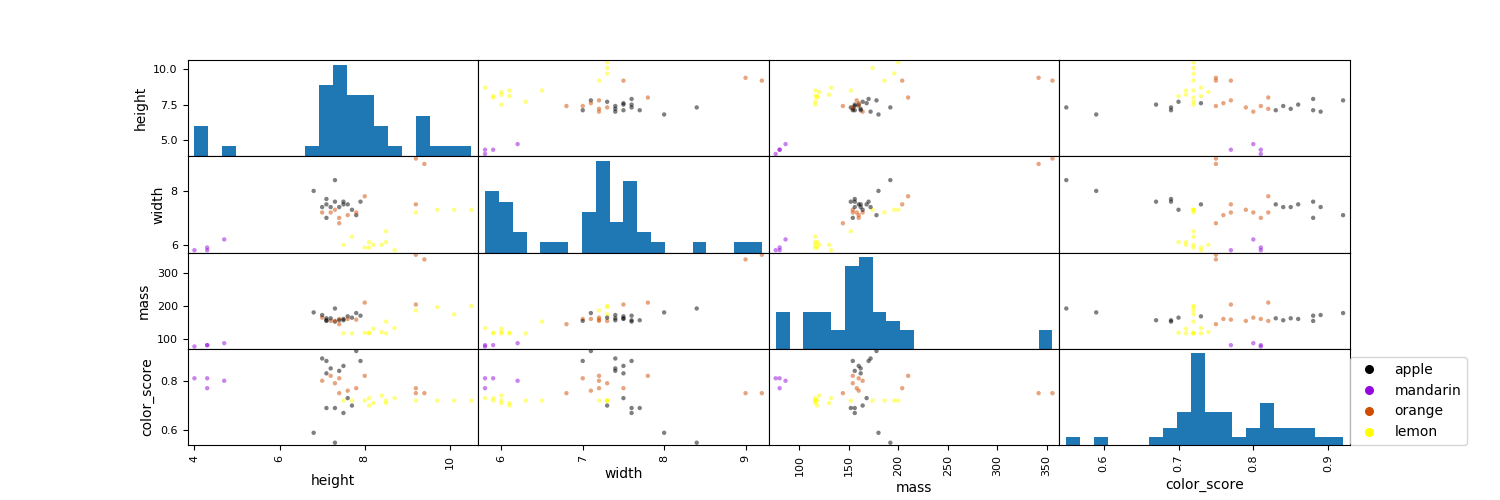

In [38]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c = y_train.values.ravel(),
                                     marker='o', s=10, hist_kwds={'bins':20}, 
                                     figsize=(15,5), cmap=cmap)

handles = [plt.plot([],[], color=plt.cm.gnuplot(i/3.), ls="", marker='o', \
                   markersize=np.sqrt(30))[0] for i in range(4)]

labels=fruits.fruit_name.unique()
plt.legend(handles, labels, loc=(1,0))
plt.show()

## 3D Plot

In [18]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


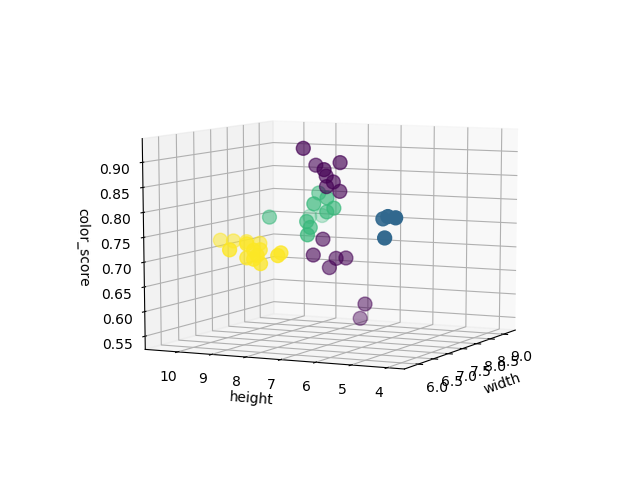

Text(0.5,0,'color_score')

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_train['width'], X_train['height'], 
           X_train['color_score'], c = y_train.values.ravel(), marker = 'o', s = 100)

ax.set_xlabel('width')
ax.set_ylabel('height')


ax.set_zlabel('color_score')

## Training the KNN Model with k = 5 (Optimal Value)

In [40]:
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# Splitting the train test data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 75% train & 25% test as default

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # setting optimal value to be 5

## Fitting the Model using Training data

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
knn.score(X_test, y_test)

0.5333333333333333

## Plotting decision boundaries of k-NN classifier


In [44]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
    
    mesh_step_size = 0.1
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                        np.arange(y_min, y_max, mesh_step_size))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()
    

C:\Users\laksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\laksh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


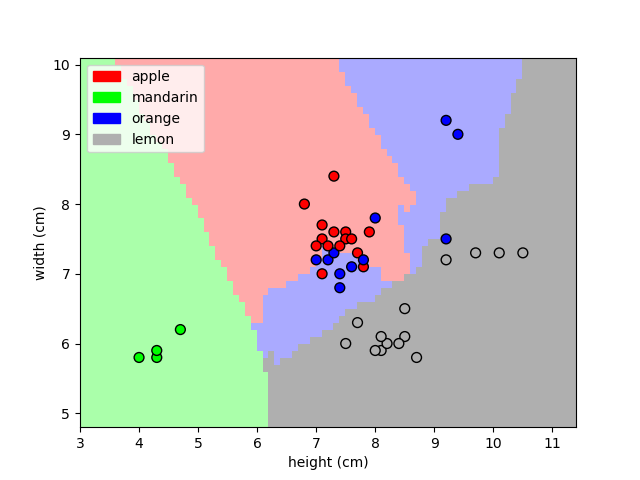

In [45]:
plot_fruit_knn(X_train, y_train, 5, 'uniform')

### KNN is sensitive to parameter K

<IPython.core.display.Javascript object>


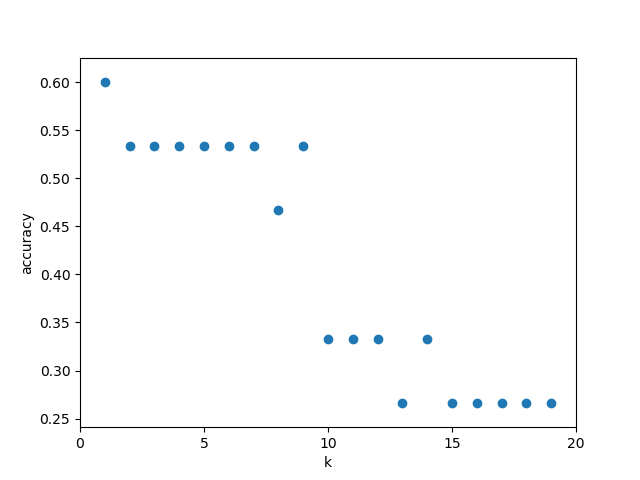

In [46]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))


plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

<IPython.core.display.Javascript object>


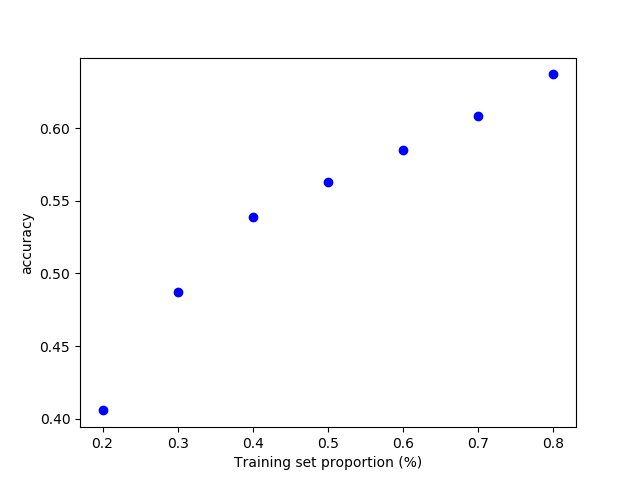

In [62]:
t = np.linspace(0.2, 0.8, 7)
knn = KNeighborsClassifier(n_neighbors=4)

plt.figure()

for s in t:
    scores = []
    for i in range(1, 1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')
    
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
        

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])